# PRE-PROCESSING

In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import os
import pandas as pd


#Import plotting packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Import machine learning
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost

from sklearn.model_selection import train_test_split #split
from sklearn.metrics import r2_score, mean_squared_error #metrics

# DATA COLLECTION

In [3]:
listing_df = pd.read_csv('listings_detail.csv', encoding = "ISO-8859-1")

In [4]:
listing_df.head()

,a,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,2.020080e+13,8/16/2020,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,https://www.airbnb.com/users/show/2845,...,10.0,10.0,9.0,NaN,f,2,2,0,0,0.37
1,3831,https://www.airbnb.com/rooms/3831,2.020080e+13,8/16/2020,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,https://a0.muscache.com/pictures/e49999c2-9fd5...,4869,https://www.airbnb.com/users/show/4869,...,9.0,9.0,9.0,NaN,f,1,1,0,0,4.75
2,5121,https://www.airbnb.com/rooms/5121,2.020080e+13,8/17/2020,BlissArtsSpace!,<b>The space</b><br />HELLO EVERYONE AND THANK...,NaN,https://a0.muscache.com/pictures/2090980c-b68e...,7356,https://www.airbnb.com/users/show/7356,...,10.0,9.0,9.0,NaN,f,1,0,1,0,0.37
3,5136,https://www.airbnb.com/rooms/5136,2.020080e+13,8/17/2020,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,https://a0.muscache.com/pictures/25405769/42d0...,7378,https://www.airbnb.com/users/show/7378,...,10.0,8.0,10.0,NaN,f,1,1,0,0,0.01
4,5178,https://www.airbnb.com/rooms/5178,2.020080e+13,8/16/2020,Large Furnished Room Near B'wayã,Please donât expect the luxury here just a b...,"Theater district, many restaurants around here.",https://a0.muscache.com/pictures/12065/f070997...,8967,https://www.airbnb.com/users/show/8967,...,9.0,10.0,9.0,NaN,f,1,0,1,0,3.44


In [5]:
listing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46527 entries, 0 to 46526
Data columns (total 74 columns):
a                                               46527 non-null int64
listing_url                                     46527 non-null object
scrape_id                                       46527 non-null float64
last_scraped                                    46527 non-null object
name                                            46509 non-null object
description                                     45196 non-null object
neighborhood_overview                           29726 non-null object
picture_url                                     46527 non-null object
host_id                                         46527 non-null int64
host_url                                        46527 non-null object
host_name                                       46492 non-null object
host_since                                      46492 non-null object
host_location                                   4636

# DATA MANIPULATION

Quality & Tidiness issues:

A lot of irrelevant columns such as listing_url, host_url, host_thumbnail url
Wrong format of attributes. Price's data typ should be float instead of object.
A lot of missing values.

In [6]:
#Reformat data type
pd.options.mode.chained_assignment = None  # default='warn'
listing_df['host_acceptance_rate'] = listing_df['host_acceptance_rate'].str.replace("%", "").astype("float")
listing_df['price'] = listing_df['price'].str.replace("[$, ]", "").astype("float")
listing_df['host_response_rate'] = listing_df['host_response_rate'].str.replace("%", "").astype("float")

In [7]:
#drop unnecessary columns
cols = ['listing_url', 'host_url', 'picture_url', 'license',
       'host_thumbnail_url', 'host_picture_url', 'neighbourhood', 'first_review', 'last_review', 'calendar_last_scraped',
       'calendar_updated', 'scrape_id', 'last_scraped', 'host_neighbourhood', 
        'neighborhood_overview', 'host_listings_count', 'host_location', 'host_total_listings_count']
listing_df.drop(cols, axis=1, inplace=True)

In [8]:
# % of NaN values
(len(listing_df)-listing_df.count())/len(listing_df)*100

a                                                0.000000
name                                             0.038687
description                                      2.860705
host_id                                          0.000000
host_name                                        0.075225
host_since                                       0.075225
host_about                                      39.658693
host_response_time                              53.519462
host_response_rate                              53.519462
host_acceptance_rate                            35.003331
host_is_superhost                                0.075225
host_verifications                               0.000000
host_has_profile_pic                             0.075225
host_identity_verified                           0.075225
neighbourhood_cleansed                           0.000000
neighbourhood_group_cleansed                     0.000000
latitude                                         0.000000
longitude     

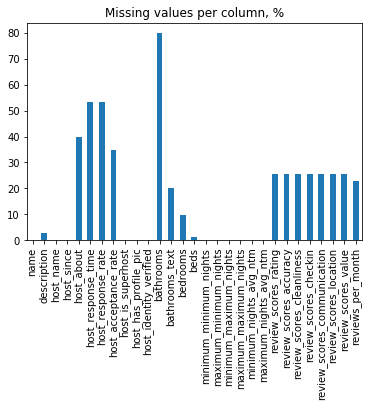

In [9]:
#find percentage of missing values for each column
listings_missing_df = listing_df.isnull().mean()*100

#filter out only columns, which have missing values
listings_columns_with_nan = listings_missing_df[listings_missing_df > 0]

#plot the results
listings_columns_with_nan.plot.bar(title='Missing values per column, %')

# DATA EXPLORATION

# 1. Property type vs. neighborhood

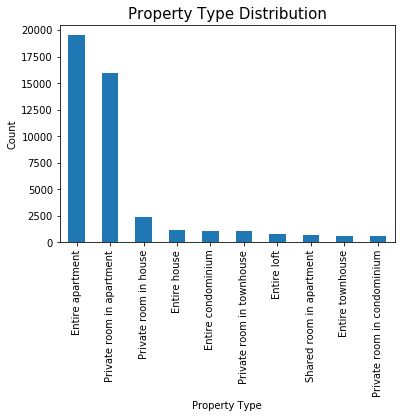

In [10]:
listing_df['property_type'].value_counts()[0:10].sort_values(ascending=False).plot(kind = 'bar')
plt.ylabel('Count')
plt.title('Property Type Distribution', size=15)
plt.xlabel('Property Type')
plt.plot();

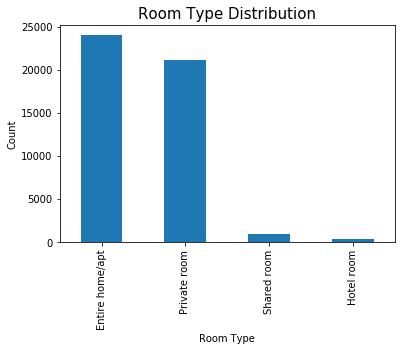

In [11]:
listing_df['room_type'].value_counts().sort_values(ascending=False).plot(kind = 'bar')
plt.ylabel('Count')
plt.title('Room Type Distribution', size=15)
plt.xlabel('Room Type')
plt.plot();

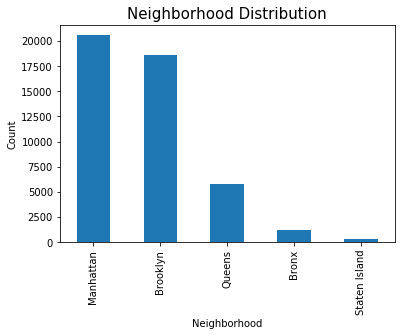

In [12]:
listing_df['neighbourhood_group_cleansed'].value_counts().sort_values(ascending=False).plot(kind = 'bar')
plt.ylabel('Count')
plt.title('Neighborhood Distribution', size=15)
plt.xlabel('Neighborhood')
plt.plot();

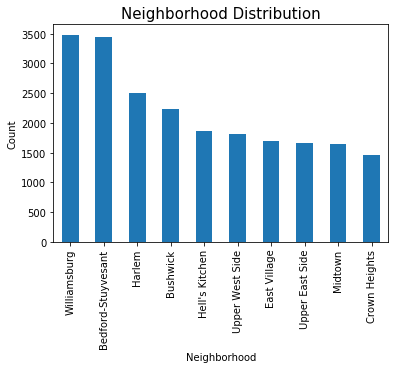

In [13]:
listing_df['neighbourhood_cleansed'].value_counts()[0:10].sort_values(ascending=False).plot(kind = 'bar')
plt.ylabel('Count')
plt.title('Neighborhood Distribution', size=15)
plt.xlabel('Neighborhood')
plt.plot();

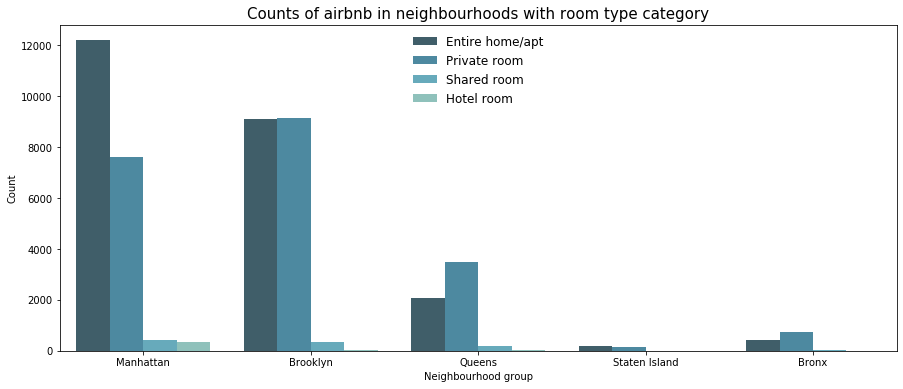

In [14]:
# VNeighbourhood groups with counts with category room_type

plt.figure(figsize=(15,6))
sns.countplot(data=listing_df, x='neighbourhood_group_cleansed', hue='room_type', palette='GnBu_d')
plt.title('Counts of airbnb in neighbourhoods with room type category', fontsize=15)
plt.xlabel('Neighbourhood group')
plt.ylabel("Count")
plt.legend(frameon=False, fontsize=12)
plt.savefig('Counts of airbnb in neighbourhoods with room type category.png')

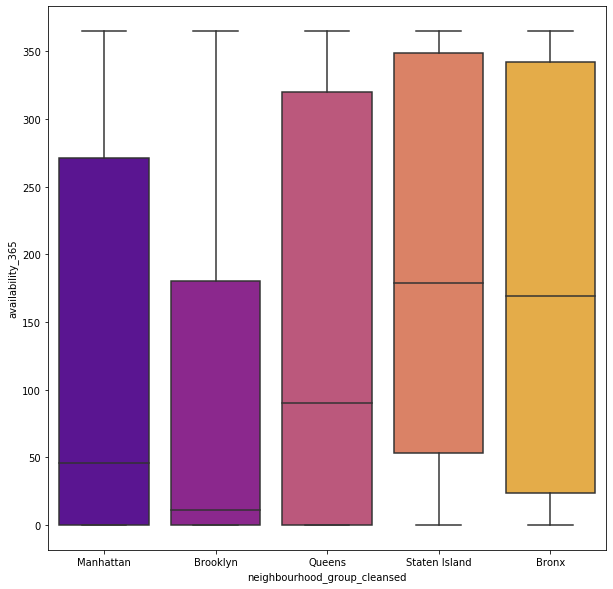

In [15]:
#Relation between neighbourgroup and Availability of Room
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=listing_df, x='neighbourhood_group_cleansed',y='availability_365',palette='plasma')
plt.savefig('neighbourgroup and Availability of Room.png')

# 2. Other attributes

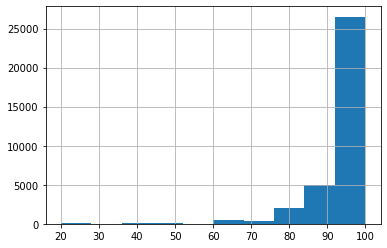

In [16]:
listing_df['review_scores_rating'].hist()

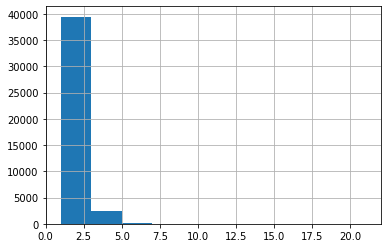

In [17]:
listing_df['bedrooms'].hist()

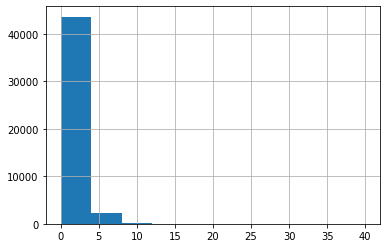

In [18]:
listing_df['beds'].hist()

In [19]:
listing_df['minimum_nights'].value_counts()

1      11331
2       9852
3       7109
30      4648
5       3030
       ...  
265        1
105        1
456        1
184        1
63         1
Name: minimum_nights, Length: 113, dtype: int64

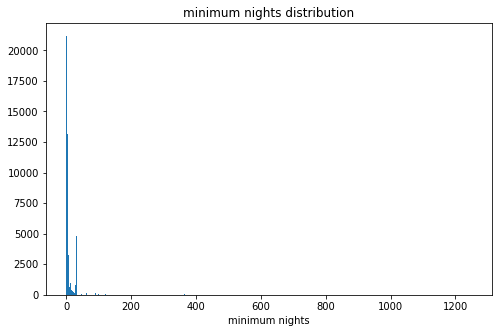

<Figure size 1296x1080 with 0 Axes>

<Figure size 1296x1080 with 0 Axes>

In [20]:
binsize = 3
bins = np.arange(0, listing_df['minimum_nights'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = listing_df, x = 'minimum_nights', bins = bins)
plt.xlabel('minimum nights')
plt.title('minimum nights distribution')
plt.show()
plt.figure(figsize=[18, 15])

In [21]:
from collections import Counter

In [22]:
results = Counter()
listing_df['amenities'].str.strip('{}')\
               .str.replace('"', '')\
               .str.lstrip('\"')\
               .str.rstrip('\"')\
               .str.split(',')\
               .apply(results.update)

0        None
1        None
2        None
3        None
4        None
         ... 
46522    None
46523    None
46524    None
46525    None
46526    None
Name: amenities, Length: 46527, dtype: object

In [23]:
results.most_common(30)

[(' Wifi', 42423),
 (' Essentials', 41962),
 (' Heating', 41020),
 (' Kitchen', 39741),
 (' Air conditioning', 34263),
 (' Hangers', 33833),
 (' Smoke alarm', 33621),
 (' TV', 31426),
 (' Hair dryer', 29298),
 (' Iron', 28402),
 (' Carbon monoxide alarm', 28026),
 (' Shampoo', 25588),
 (' Laptop-friendly workspace', 24368),
 (' Hot water', 20654),
 (' Refrigerator', 19736),
 (' Dishes and silverware', 19473),
 (' Fire extinguisher', 17139),
 (' Microwave', 16866),
 (' Cooking basics', 16131),
 (' Washer', 14807),
 (' First aid kit', 14710),
 (' Oven', 14156),
 (' Bed linens', 13986),
 (' Dryer', 12896),
 (' Free street parking', 11629),
 (' Lock on bedroom door', 11308),
 (' Extra pillows and blankets', 10359),
 ('[Coffee maker', 10240),
 (' Cable TV', 10177),
 (' Private entrance', 9629)]

# 3. Price

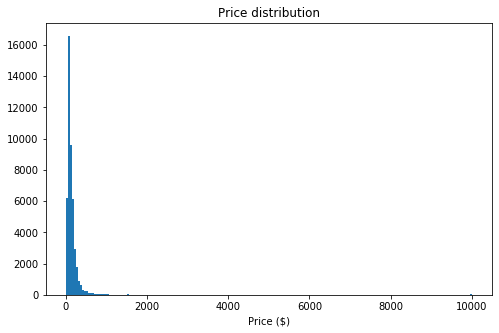

In [24]:
# Price distribution
binsize = 50
bins = np.arange(0, listing_df['price'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = listing_df, x = 'price', bins = bins)
plt.xlabel('Price ($)')
plt.title('Price distribution')
plt.show()

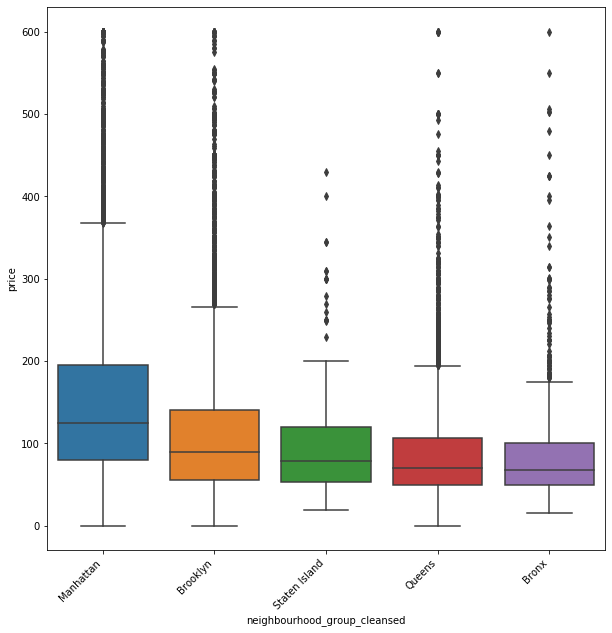

In [25]:
plt.figure(figsize=(10,10))
sort_order = listing_df.query('price <= 600')\
                    .groupby('neighbourhood_group_cleansed')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
sns.boxplot(y='price', x='neighbourhood_group_cleansed', data=listing_df.query('price <= 600'), 
            order=sort_order)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

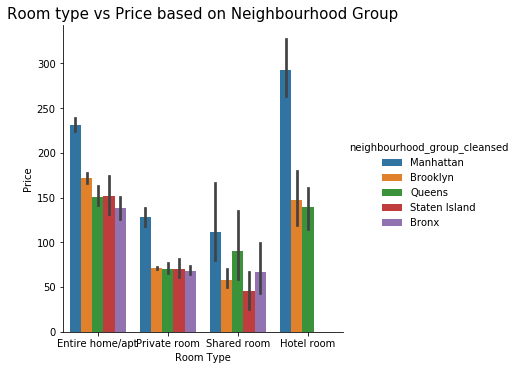

In [26]:

#Relation between neighbourgroup and Availability of Room based on neighbourhood_group
sns.catplot(x="room_type", y="price", hue="neighbourhood_group_cleansed", kind="bar", data=listing_df)
plt.title('Room type vs Price based on Neighbourhood Group', fontsize=15)
plt.xlabel('Room Type')
plt.ylabel("Price")
plt.savefig('Price.png')

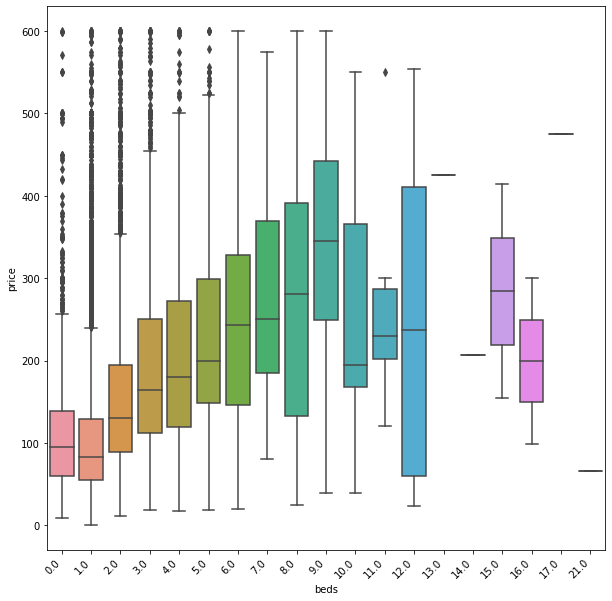

In [27]:
# What is the range of prices for number of beds?
plt.figure(figsize=(10,10))
sort_order = listing_df.query('price <= 600')\
                    .groupby('beds')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
sns.boxplot(y='price', x='beds', data=listing_df.query('price <= 600'))
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

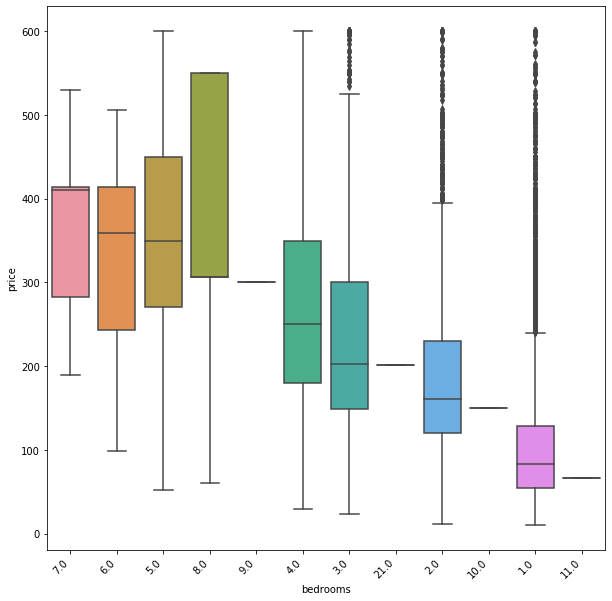

In [28]:

# What is the range of prices for different number of bathrooms?
plt.figure(figsize=(10,10))
sort_order = listing_df.query('price <= 600')\
                    .groupby('bedrooms')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
sns.boxplot(y='price', x='bedrooms', data=listing_df.query('price <= 600'), order = sort_order)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

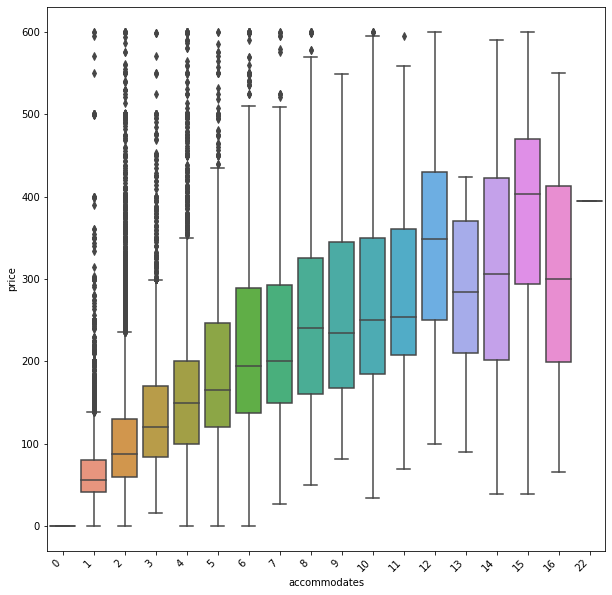

In [29]:
plt.figure(figsize=(10,10))
sort_order = listing_df.query('price <= 600')\
                    .groupby('accommodates')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
sns.boxplot(y='price', x='accommodates', data=listing_df.query('price <= 600'))
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

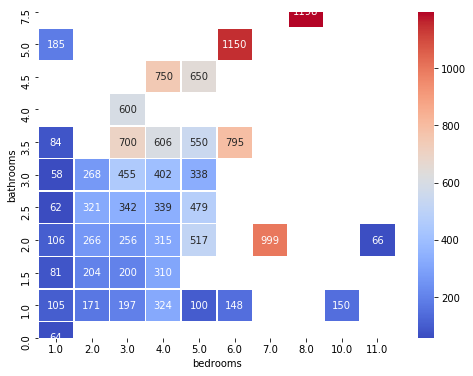

In [30]:
# visualizae the price
plt.figure(figsize=(8, 6))
sns.heatmap(listing_df.groupby(['bathrooms', 'bedrooms']).mean()['price'].reset_index()\
                .pivot('bathrooms', 'bedrooms', 'price').sort_index(ascending=False),
            cmap="coolwarm", fmt='.0f', annot=True, linewidths=0.5);

# 4. Price Prediction

In [31]:
#copy dataset
df= listing_df.copy()

In [32]:
df.head()

,a,name,description,host_id,host_name,host_since,host_about,host_response_time,host_response_rate,host_acceptance_rate,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",2845,Jennifer,9/9/2008,A New Yorker since 2000! My passion is creatin...,within a day,61.0,26.0,...,10.0,10.0,10.0,9.0,f,2,2,0,0,0.37
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",4869,LisaRoxanne,12/7/2008,Laid-back Native New Yorker (formerly bi-coast...,within a few hours,90.0,96.0,...,9.0,9.0,9.0,9.0,f,1,1,0,0,4.75
2,5121,BlissArtsSpace!,<b>The space</b><br />HELLO EVERYONE AND THANK...,7356,Garon,2/3/2009,"I am an artist(painter, filmmaker) and curato...",NaN,NaN,67.0,...,10.0,10.0,9.0,9.0,f,1,0,1,0,0.37
3,5136,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,7378,Rebecca,2/3/2009,"Rebecca is an artist/designer, and Henoch is i...",within a few hours,100.0,NaN,...,10.0,10.0,8.0,10.0,f,1,1,0,0,0.01
4,5178,Large Furnished Room Near B'wayã,Please donât expect the luxury here just a b...,8967,Shunichi,3/3/2009,I used to work for a financial industry but no...,within a few hours,100.0,100.0,...,9.0,9.0,10.0,9.0,f,1,0,1,0,3.44


In [91]:
df2 = df[["host_response_rate", "host_acceptance_rate", "host_is_superhost", "property_type","room_type", "accommodates", "bedrooms", 
               "beds", "price", "number_of_reviews", "review_scores_rating",
               "reviews_per_month"]]

In [84]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46527 entries, 0 to 46526
Data columns (total 12 columns):
host_response_rate      21626 non-null float64
host_acceptance_rate    30241 non-null float64
host_is_superhost       46492 non-null object
property_type           46527 non-null object
room_type               46527 non-null object
accommodates            46527 non-null int64
bedrooms                42070 non-null float64
beds                    46010 non-null float64
price                   46527 non-null float64
number_of_reviews       46527 non-null int64
review_scores_rating    34718 non-null float64
reviews_per_month       35816 non-null float64
dtypes: float64(7), int64(2), object(3)
memory usage: 4.3+ MB


In [86]:
corr = df1.corr()
corr

,host_response_rate,host_acceptance_rate,accommodates,bedrooms,beds,price,number_of_reviews,review_scores_rating,reviews_per_month
host_response_rate,1.000000,0.255580,0.016088,-0.000170,0.027749,-0.038869,0.093725,0.089082,0.109141
host_acceptance_rate,0.255580,1.000000,0.075155,0.025888,0.066778,-0.005622,0.176876,-0.026293,0.293084
accommodates,0.016088,0.075155,1.000000,0.727225,0.727730,0.239613,0.076244,-0.001061,0.112301
bedrooms,-0.000170,0.025888,0.727225,1.000000,0.721509,0.219583,0.005850,0.012544,0.031025
beds,0.027749,0.066778,0.727730,0.721509,1.000000,0.171326,0.067093,-0.007649,0.095192
price,-0.038869,-0.005622,0.239613,0.219583,0.171326,1.000000,-0.036183,0.022570,-0.033112
number_of_reviews,0.093725,0.176876,0.076244,0.005850,0.067093,-0.036183,1.000000,0.047919,0.729529
review_scores_rating,0.089082,-0.026293,-0.001061,0.012544,-0.007649,0.022570,0.047919,1.000000,0.047372
reviews_per_month,0.109141,0.293084,0.112301,0.031025,0.095192,-0.033112,0.729529,0.047372,1.000000


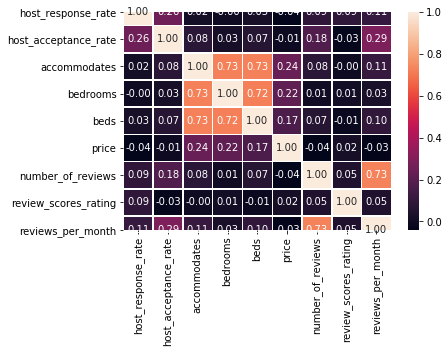

<Figure size 1152x504 with 0 Axes>

In [36]:
sns.heatmap(corr, annot=True, linewidths=.5, fmt='.2f');
fig = plt.figure(figsize = (16,7))

In [92]:

# Fill missing values
#fill in missing values for bathrooms, bedrooms and beds with mode
df2['bedrooms'] = df2['bedrooms'].fillna(df2['bedrooms'].mode())
df2['beds'] = df2['beds'].fillna(df2['beds'].mode())

In [94]:
# % of NaN values
(len(df2)-df2.count())/len(df2)*100

host_response_rate      53.519462
host_acceptance_rate    35.003331
host_is_superhost        0.075225
property_type            0.000000
room_type                0.000000
accommodates             0.000000
bedrooms                 9.577235
beds                     1.111183
price                    0.000000
number_of_reviews        0.000000
review_scores_rating    25.380962
reviews_per_month       23.021042
dtype: float64

In [95]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46527 entries, 0 to 46526
Data columns (total 12 columns):
host_response_rate      21626 non-null float64
host_acceptance_rate    30241 non-null float64
host_is_superhost       46492 non-null object
property_type           46527 non-null object
room_type               46527 non-null object
accommodates            46527 non-null int64
bedrooms                42071 non-null float64
beds                    46010 non-null float64
price                   46527 non-null float64
number_of_reviews       46527 non-null int64
review_scores_rating    34718 non-null float64
reviews_per_month       35816 non-null float64
dtypes: float64(7), int64(2), object(3)
memory usage: 4.3+ MB


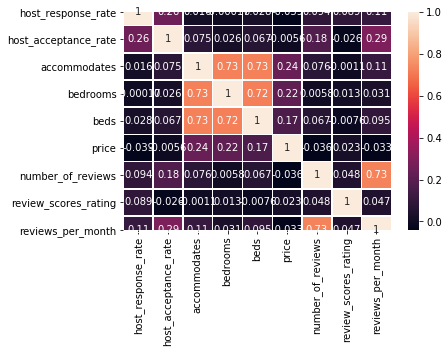

<Figure size 1152x504 with 0 Axes>

In [56]:
sns.heatmap(corr, annot=True, linewidths=.5);
fig = plt.figure(figsize = (16,7))

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
%matplotlib inline

In [106]:

# Model A: Simple linear regression
# Explanatory variables: 'accommodates'
# Target: 'price'

features = ['accommodates']
X = new_df[features]
y = new_df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4)

reg = LinearRegression().fit(X_train, y_train)
y_train_pred = reg.predict(X_train)
train_score = r2_score(y_train, y_train_pred)
print('Train score: ' + str(train_score))

y_test_pred = reg.predict(X_test)
test_score = r2_score(y_test, y_test_pred)
print('Test score: ' + str(test_score))

Train score: 0.07035807062270005
Test score: 0.03523488859658175


In [107]:

X_stats = sm.add_constant(X_train)
est = sm.OLS(y_train, X_stats)
stats = est.fit()
print(stats.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     2465.
Date:                Tue, 27 Oct 2020   Prob (F-statistic):               0.00
Time:                        19:39:20   Log-Likelihood:            -2.3099e+05
No. Observations:               32568   AIC:                         4.620e+05
Df Residuals:                   32566   BIC:                         4.620e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           27.1135      2.918      9.292   

C:\Users\PhuongAnh\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
